Imagine que você foi escalado para um time de investimentos e precisará realizar um modelo preditivo com dados da IBOVESPA para criar uma série temporal e prever diariamente o fechamento da base.

Para isso, utilize a base de dados contida no site da investing e selecione o período "diário", com o intervalo de tempo que achar adequado.

Você precisará demonstrar para o time de investimentos:

* o modelo com o storytelling, desde a captura do dado até a entrega do modelo
* justificar a técnica utilizada

*atingir uma acuracidade adequada (acima de 70%)

In [151]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.tsa.seasonal import seasonal_decompose


In [152]:
#tendencia - direção
#sazonalidade - recorrencia das oscilações -> entender como funcionam as oscilações da série temporal
#resíduo - o que sobra do sinal
# desde 2020
df_path = "https://raw.githubusercontent.com/kebaggio/techChallengeFase2/main/base/Dados%20Histo%CC%81ricos%20-%20Ibovespa.csv"


#desde 2000
#df_path = "https://raw.githubusercontent.com/kebaggio/techChallengeFase2/main/base/Dados%20Histo%CC%81ricos%20-%20Ibovespa%202000.csv"

coluna_data=["Data"]

df = pd.read_csv(df_path, sep=',', parse_dates=coluna_data, dayfirst=True, index_col='Data')


In [153]:
df.head()

,Último,Abertura,Máxima,Mínima,Vol.,Var%
Data,,,,,,
2024-01-05,132.023,131.218,132.635,130.579,"9,20M","0,61%"
2024-01-04,131.226,132.831,132.885,131.024,"8,97M","-1,21%"
2024-01-03,132.834,132.697,133.576,132.250,"8,70M","0,10%"
2024-01-02,132.697,134.186,134.195,132.095,"8,44M","-1,11%"
2023-12-28,134.185,134.194,134.389,133.832,"7,81M","-0,01%"


In [154]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 995 entries, 2024-01-05 to 2020-01-07
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Último    995 non-null    float64
 1   Abertura  995 non-null    float64
 2   Máxima    995 non-null    float64
 3   Mínima    995 non-null    float64
 4   Vol.      995 non-null    object 
 5   Var%      995 non-null    object 
dtypes: float64(4), object(2)
memory usage: 54.4+ KB


In [155]:
#df.loc['2024-01-02']

In [156]:
# Configure a frequência do índice como frequência comercial (B para business days)
df.index = pd.to_datetime(df.index, format='%d/%m/%Y').to_period('B')

/var/folders/v9/bcwxmmds3r58z4zd22tpx4k00000gn/T/ipykernel_13867/3687064159.py:2: FutureWarning: PeriodDtype[B] is deprecated and will be removed in a future version. Use a DatetimeIndex with freq='B' instead
  df.index = pd.to_datetime(df.index, format='%d/%m/%Y').to_period('B')


In [157]:
df = df.drop(['Vol.', 'Var%'], axis=1)

#df['Vol.'] = df['Vol.'].replace('[^\d.]', '', regex=True).astype(float)
#df['Var%'] = df['Var%'].replace('[^\d.]', '', regex=True).astype(float)



In [158]:
# Selecione uma coluna específica para a decomposição, por exemplo, 'Abertura'
serie_temporal = df['Abertura']

# Aplicar decomposição sazonal
resultados = seasonal_decompose(serie_temporal, period=12)  # Substitua 12 pelo período apropriado, se conhecido


<Axes: xlabel='Data'>

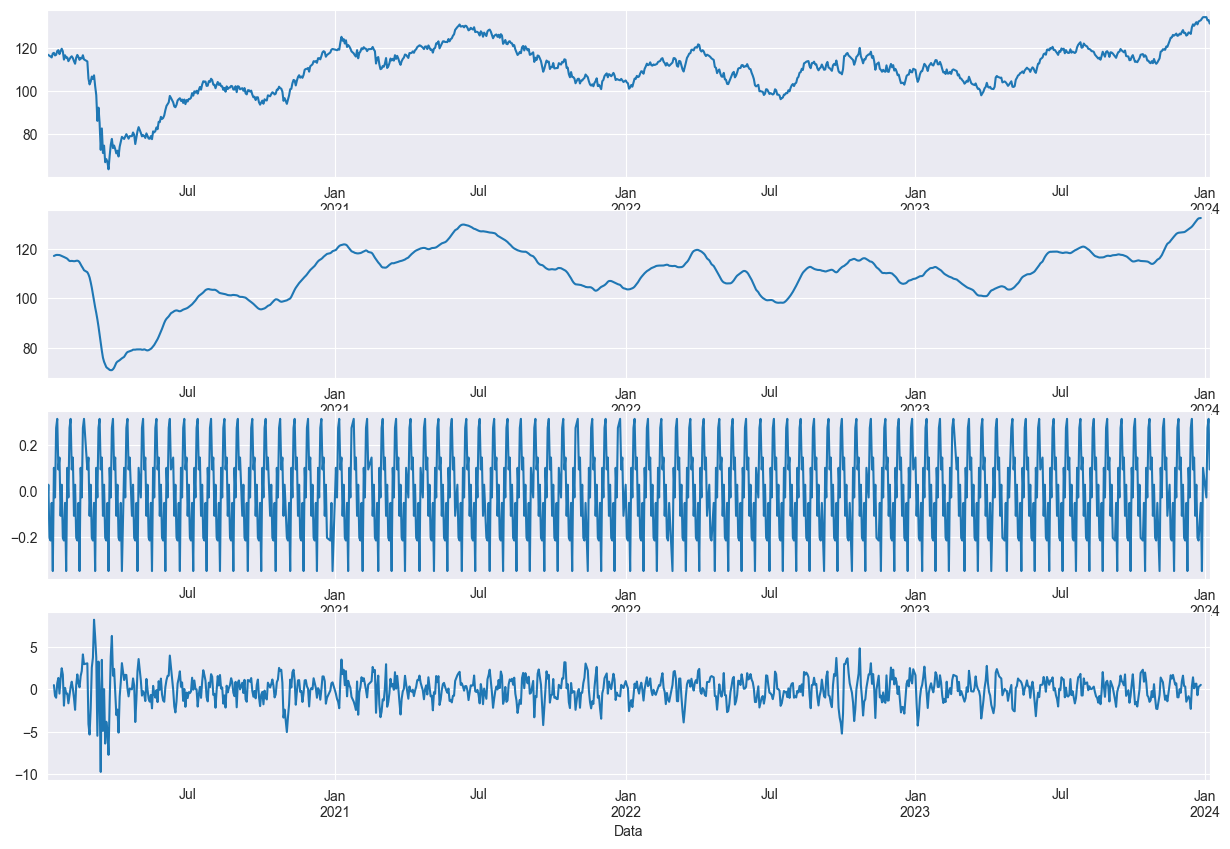

In [159]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4,1, figsize = (15,10))
# série real
resultados.observed.plot(ax=ax1)

# tendencia
resultados.trend.plot(ax=ax2)

#sazonalidade
resultados.seasonal.plot(ax=ax3)

#residuos
resultados.resid.plot(ax=ax4)



In [160]:
#estacionaria é algo onde a media, variancia e covariancia são constantes. Caso varie, não é estacionária

#ADF Augmented Dickey Fuller - avaliar se existe ou nao estacionariedade na serie

#H0 - Hipótese Nula (não é estacionária)
#H1 - hipotese alternativa (rejeição da hipótese nula)

# p -value = 0.05 (5%), entao rejeitamos H0 com um nível de confiança de 95%




In [161]:
from statsmodels.tsa.stattools import adfuller

In [162]:
sns.set_style('darkgrid')

In [163]:
X=df.Último.values

In [164]:
result=adfuller(X)

In [165]:
print("Teste ADF")
print(f"Teste Estatistico: {result[0]}")
print(f"P-Value: : {result[1]}")
print("Valores críticos:")

for key, value in result[4].items():
    print(f"\t{key}: {value}")

Teste ADF
Teste Estatistico: -3.0508796980465647
P-Value: : 0.0304083971271029
Valores críticos:
	1%: -3.4369994990319355
	5%: -2.8644757356011743
	10%: -2.5683331327427803


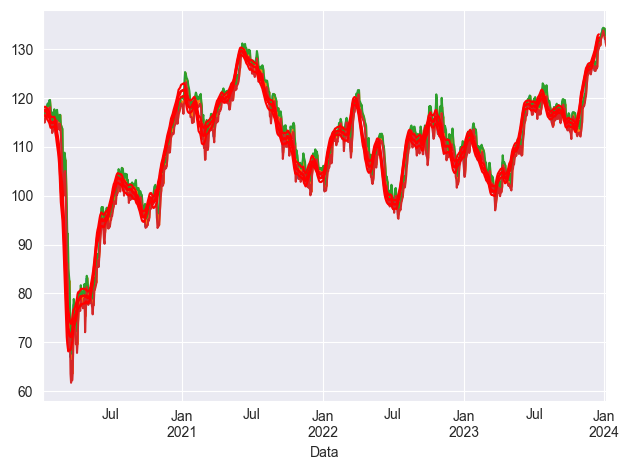

In [166]:
ma = df.rolling(12).mean()

f, ax = plt.subplots()
df.plot(ax=ax, legend=False)

ma.plot(ax=ax, legend=False, color='r')
plt.tight_layout()